In [1]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-01-29 15:25:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   174MB/s    in 0.4s    

2022-01-29 15:25:17 (174 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [3]:
!rm -rf cats_and_dogs_filtered.zip
!pip install tensorflow
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
dataset_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cats')))
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dogs')))

dataset_validation_dir = os.path.join(dataset_dir, 'validation')
dataset_validation_cats_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cats')))
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dogs')))

print('train cats: %s' % dataset_train_cats_len)
print('train dogs: %s' % dataset_train_dogs_len)
print('validation cats: %s' % dataset_validation_cats_len)
print('validation dogs: %s' % dataset_validation_dogs_len)

train cats: 1000
train dogs: 1000
validation cats: 500
validation dogs: 500


In [15]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 32
epochs = 20
learning_rate = 0.0001

class_names = ['gato', 'cachorro']

In [16]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


ali em cima ele está apenas montando a base de dados e transformando em 160x160

abaixo Criação dos datasets de treinamento, validação e testes


In [17]:
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 26
Test Dataset Cardinality: 6


plotando imagens do dataset

In [18]:
def plot_dataset(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):

        for i in range(9):

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

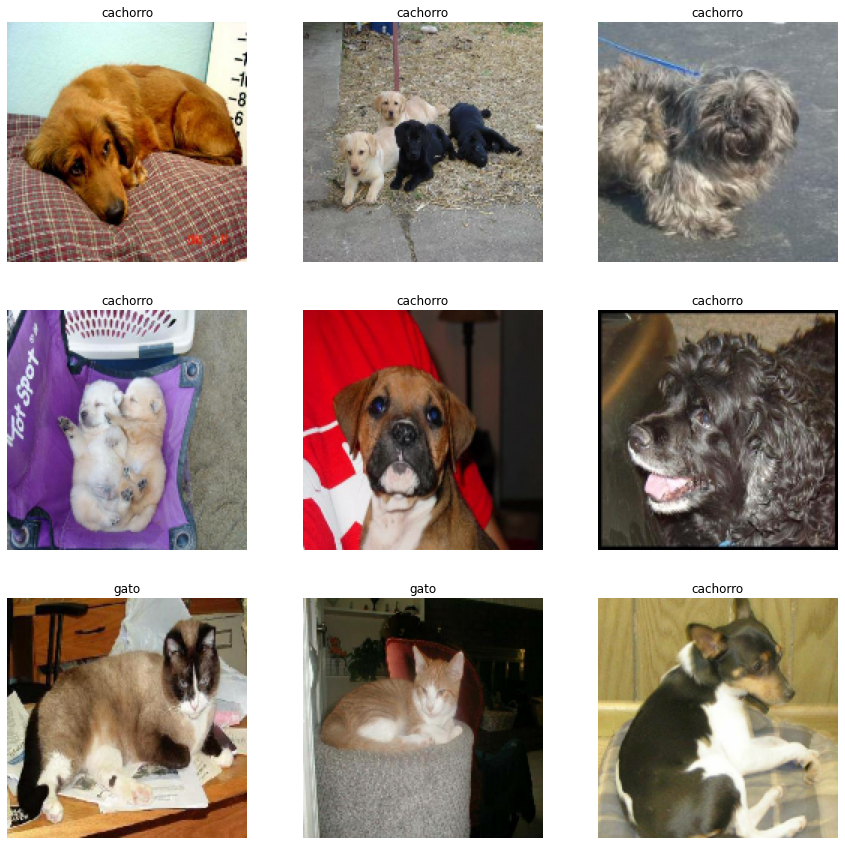

In [19]:
plot_dataset(dataset_train)
plot_dataset(dataset_validation)
plot_dataset(dataset_test)

criando modelo

In [21]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.experimental.preprocessing.Rescaling(
        1. / image_color_channel_size, 
        input_shape = image_shape 
  ), 
  tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'), 
  tf.keras.layers. MaxPooling2D(), 
  tf.keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'), 
  tf.keras.layers. MaxPooling2D(), 
  tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'), 
  tf.keras.layers. MaxPooling2D(), 
  tf.keras.layers. Flatten(),
  tf.keras.layers.Dense(128, activation = 'relu'), 
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        1

treinando modelo

In [22]:
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs
)

Epoch 1/20
63/63 [==============================] - 59s 912ms/step - loss: 0.6969 - accuracy: 0.5120 - val_loss: 0.6870 - val_accuracy: 0.4950
Epoch 2/20
63/63 [==============================] - 58s 917ms/step - loss: 0.6804 - accuracy: 0.5670 - val_loss: 0.6704 - val_accuracy: 0.6114
Epoch 3/20
63/63 [==============================] - 57s 899ms/step - loss: 0.6480 - accuracy: 0.6390 - val_loss: 0.6380 - val_accuracy: 0.6089
Epoch 4/20
63/63 [==============================] - 57s 905ms/step - loss: 0.6132 - accuracy: 0.6685 - val_loss: 0.6429 - val_accuracy: 0.6213
Epoch 5/20
63/63 [==============================] - 57s 904ms/step - loss: 0.5940 - accuracy: 0.6760 - val_loss: 0.5915 - val_accuracy: 0.6597
Epoch 6/20
63/63 [==============================] - 58s 920ms/step - loss: 0.5551 - accuracy: 0.7370 - val_loss: 0.5939 - val_accuracy: 0.6634
Epoch 7/20
63/63 [==============================] - 58s 910ms/step - loss: 0.5305 - accuracy: 0.7420 - val_loss: 0.5976 - val_accuracy: 0.6931

enviando um dataset que ele nunca viu



In [23]:
def plot_dataset_predictions(dataset):

    features, labels = dataset_test.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print('Labels:      %s' % labels)
    print('Predictions: %s' % predictions.numpy())

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for i in range(9):

        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

Labels:      [0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0]
Predictions: [1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0]


<Figure size 432x288 with 0 Axes>

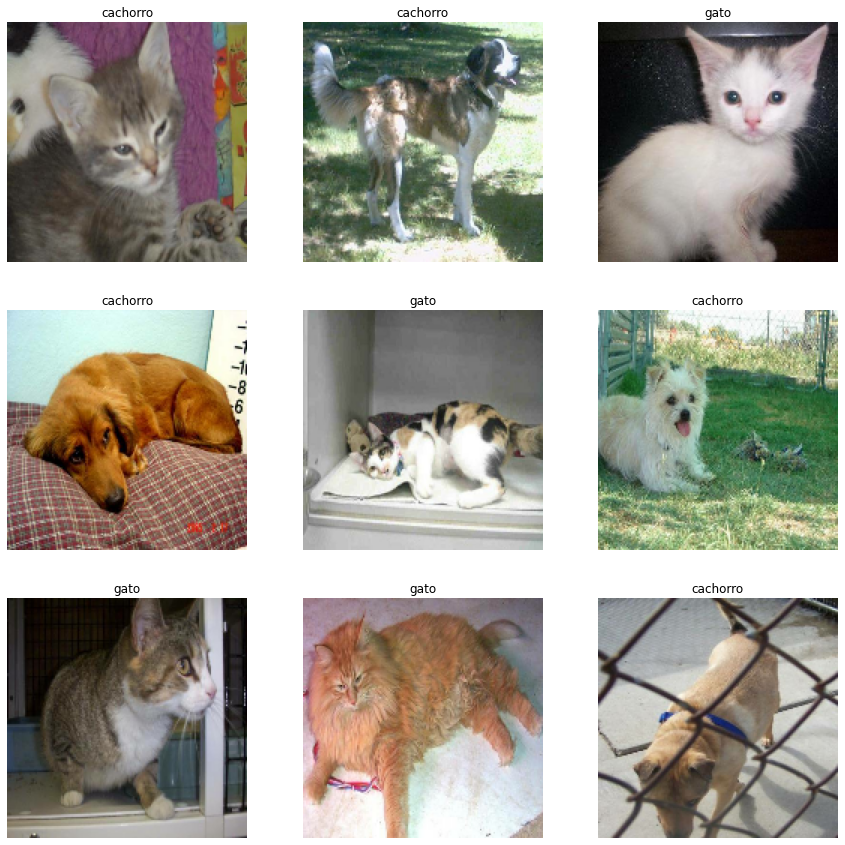

In [33]:
plot_dataset_predictions(dataset_test)

In [26]:
model.save('path/to/model')

INFO:tensorflow:Assets written to: path/to/model/assets


In [28]:
model = tf.keras.models.load_model('path/to/model')